# Movies Dataset from Pirated Sites

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.读取数据

In [2]:
df = pd.read_csv('movies_dataset.csv')
df.columns

Index(['Unnamed: 0', 'IMDb-rating', 'appropriate_for', 'director', 'downloads',
       'id', 'industry', 'language', 'posted_date', 'release_date', 'run_time',
       'storyline', 'title', 'views', 'writer'],
      dtype='object')

### Columns
    id: movie's unique id
    title: movie's name
    storyline: a short description of the movie
    views: no. of clicks per movie
    downloads: no. of downloads per movie
    IMDb-rating: rating
    appropriate_for: R-rated, PG-13, etc
    language: this can be multiple languages also
    industry: Hollywood, Bollywood, etc.
    posted_date: when the movie is posted on the platform
    release_date: when the movie is released worldwide
    runtime: in minutes
    director: director's name
    writer: list of all the writers

有14列有效数据，将columns='Unnamed: 0'去掉

In [3]:
df = df.drop(columns='Unnamed: 0')

In [4]:
df.columns = df.columns.str.replace('-', '_').str.lower()
df.columns

Index(['imdb_rating', 'appropriate_for', 'director', 'downloads', 'id',
       'industry', 'language', 'posted_date', 'release_date', 'run_time',
       'storyline', 'title', 'views', 'writer'],
      dtype='object')

In [5]:
for column in df:
    print(column)

imdb_rating
appropriate_for
director
downloads
id
industry
language
posted_date
release_date
run_time
storyline
title
views
writer


备份df数据

In [6]:
old_df = df.copy(deep=True)

In [7]:
# 对dataframe的列的类型、样本、不同值的数量， 缺失值的比例
def df_dtype(data):
    cols, dtype_col, specimens, nunique, null_count,null_share = [], [], [], [], [],[]
    for column in data.columns:
        cols.append(column)
        this_dtype = data[column].dtype
        dtype_col.append(this_dtype)
        specimen = data.loc[data[column].first_valid_index(), column]
        specimens.append(specimen)
        this_nunique = data[column].nunique()
        nunique.append(this_nunique)
        null_sum = data[column].isna().sum()
        null_count.append(null_sum)
        null_percent = null_sum/len(data[column])
        null_share.append(f'{null_percent:.2%}')
    
    df = pd.DataFrame(list(zip(
            dtype_col,
            specimens,
            nunique,
            null_count,
            null_share
        )), index = cols)
    
    df.columns = [
        'dtype',
        'specimen',
        'nunique',
        'null_count',
        'null_share'
    ]
    return df
        

列的类型，采样，不同取值的数量，空值的数量，和控制所占的比例如下

In [8]:
df_dtype(df)

,dtype,specimen,nunique,null_count,null_share
imdb_rating,float64,4.8,85,841,4.09%
appropriate_for,object,R,21,9476,46.12%
director,object,John Swab,9672,1938,9.43%
downloads,object,304,10625,1,0.00%
id,int64,372092,17086,0,0.00%
industry,object,Hollywood / English,10,1,0.00%
language,object,English,1168,542,2.64%
posted_date,object,"20 Feb, 2023",4123,1,0.00%
release_date,object,Jan 28 2023,4886,1,0.00%
run_time,object,105,415,1768,8.60%


downloads 和 views 是object类型，需要将其转为数值类型， id需要将其转换为STR

In [9]:
for col in 'views', 'downloads':
    df[col] = df[col].str.replace(',','')
    df[col] = df[col].astype('float')

df['id'] = df['id'].astype('str')

In [10]:
df_dtype(df)

,dtype,specimen,nunique,null_count,null_share
imdb_rating,float64,4.8,85,841,4.09%
appropriate_for,object,R,21,9476,46.12%
director,object,John Swab,9672,1938,9.43%
downloads,float64,304.0,10625,1,0.00%
id,object,372092,17086,0,0.00%
industry,object,Hollywood / English,10,1,0.00%
language,object,English,1168,542,2.64%
posted_date,object,"20 Feb, 2023",4123,1,0.00%
release_date,object,Jan 28 2023,4886,1,0.00%
run_time,object,105,415,1768,8.60%


In [11]:
df.describe()

,imdb_rating,downloads,views
count,19707.000000,20547.000000,2.054700e+04
mean,5.762151,10795.238916,3.559551e+04
std,1.374041,23716.181987,6.247242e+04
min,1.100000,0.000000,6.670000e+02
25%,4.800000,855.500000,7.571500e+03
50%,5.700000,2716.000000,1.522200e+04
75%,6.600000,10070.000000,3.657100e+04
max,9.900000,391272.000000,1.638533e+06


In [12]:
border = 12*'='
    
print(border, 'Basic Info', border)
df.info()

============ Basic Info ============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20548 entries, 0 to 20547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   imdb_rating      19707 non-null  float64
 1   appropriate_for  11072 non-null  object 
 2   director         18610 non-null  object 
 3   downloads        20547 non-null  float64
 4   id               20548 non-null  object 
 5   industry         20547 non-null  object 
 6   language         20006 non-null  object 
 7   posted_date      20547 non-null  object 
 8   release_date     20547 non-null  object 
 9   run_time         18780 non-null  object 
 10  storyline        18847 non-null  object 
 11  title            20547 non-null  object 
 12  views            20547 non-null  float64
 13  writer           18356 non-null  object 
dtypes: float64(3), object(11)
memory usage: 2.2+ MB


In [13]:
df.head(5)

,imdb_rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,4.8,R,John Swab,304.0,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,2794.0,John Swab
1,6.4,TV-PG,Paul Ziller,73.0,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002.0,John Christian Plummer
2,5.2,R,Ben Wheatley,1427.0,343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,14419.0,Ben Wheatley
3,8.1,NaN,Venky Atluri,1549.0,372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,4878.0,Venky Atluri
4,4.6,NaN,Shaji Kailas,657.0,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,2438.0,Rajesh Jayaraman


查看是否有重复数据，如果有重复数据，将重复数据删除

In [14]:
if df.duplicated().sum()>0:
    print(f'Amount of dumplicated rows:{df.duplicated().sum()}')
    df.drop_duplicates(inplace=True, ignore_index=True)
    print('Duplicated rows were dropped')
else:
    print('None')

None


没有重复数据

## 2 数据分析

（1）id

In [15]:
print("id的不同取值：", df['id'].nunique())
print('id 的总条数：',len(df['id']))

id的不同取值： 17086
id 的总条数： 20548


说明有重复的电影记录数据，但不是完全重复，因为上面已经去重了

In [16]:
count = df['id'].value_counts()
ids = []
ids_count = []
for i in count.index:
    if count[i]>1:
        ids.append(str(i))
        ids_count.append(count[i])

id_count = pd.DataFrame(list(zip(ids,ids_count)))
id_count.columns = ['id','counts']
id_count


,id,counts
0,372090,402
1,371744,402
2,371877,402
3,372092,202
4,371991,202
...,...,...
102,1070,2
103,1068,2
104,1064,2
105,1080,2


In [17]:
df[df['id']==ids[1]]

,imdb_rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
41,8.8,NaN,Xavier Manrique,75.0,371744,Hollywood / English,English,"13 Feb, 2023",Feb 03 2023,101,Follows\r\n a New York City family hiding out ...,Who Invited Charlie?,1676.0,Nicholas Schutt
51,8.8,NaN,Xavier Manrique,75.0,371744,Hollywood / English,English,"13 Feb, 2023",Feb 03 2023,101,Follows\r\n a New York City family hiding out ...,Who Invited Charlie?,1677.0,Nicholas Schutt
85,8.8,NaN,Xavier Manrique,75.0,371744,Hollywood / English,English,"13 Feb, 2023",Feb 03 2023,101,Follows\r\n a New York City family hiding out ...,Who Invited Charlie?,1678.0,Nicholas Schutt
129,8.8,NaN,Xavier Manrique,75.0,371744,Hollywood / English,English,"13 Feb, 2023",Feb 03 2023,101,Follows\r\n a New York City family hiding out ...,Who Invited Charlie?,1679.0,Nicholas Schutt
173,8.8,NaN,Xavier Manrique,75.0,371744,Hollywood / English,English,"13 Feb, 2023",Feb 03 2023,101,Follows\r\n a New York City family hiding out ...,Who Invited Charlie?,1680.0,Nicholas Schutt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17467,8.8,NaN,Xavier Manrique,75.0,371744,Hollywood / English,English,"13 Feb, 2023",Feb 03 2023,101,Follows\r\n a New York City family hiding out ...,Who Invited Charlie?,2082.0,Nicholas Schutt
17511,8.8,NaN,Xavier Manrique,75.0,371744,Hollywood / English,English,"13 Feb, 2023",Feb 03 2023,101,Follows\r\n a New York City family hiding out ...,Who Invited Charlie?,2083.0,Nicholas Schutt
17555,8.8,NaN,Xavier Manrique,75.0,371744,Hollywood / English,English,"13 Feb, 2023",Feb 03 2023,101,Follows\r\n a New York City family hiding out ...,Who Invited Charlie?,2084.0,Nicholas Schutt
17599,8.8,NaN,Xavier Manrique,75.0,371744,Hollywood / English,English,"13 Feb, 2023",Feb 03 2023,101,Follows\r\n a New York City family hiding out ...,Who Invited Charlie?,2085.0,Nicholas Schutt


In [18]:
df[df['id']==ids[14]]

,imdb_rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
63,NaN,NaN,NaN,309.0,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,NaN,NaN,TNA.Impact 2023-02-09,1337.0,NaN
17680,NaN,NaN,NaN,309.0,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,NaN,NaN,TNA.Impact 2023-02-09,1341.0,NaN
17718,NaN,NaN,NaN,309.0,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,NaN,NaN,TNA.Impact 2023-02-09,1342.0,NaN
17756,NaN,NaN,NaN,309.0,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,NaN,NaN,TNA.Impact 2023-02-09,1343.0,NaN
17794,NaN,NaN,NaN,309.0,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,NaN,NaN,TNA.Impact 2023-02-09,1344.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20416,NaN,NaN,NaN,309.0,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,NaN,NaN,TNA.Impact 2023-02-09,1415.0,NaN
20454,NaN,NaN,NaN,309.0,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,NaN,NaN,TNA.Impact 2023-02-09,1416.0,NaN
20492,NaN,NaN,NaN,309.0,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,NaN,NaN,TNA.Impact 2023-02-09,1417.0,NaN
20530,NaN,NaN,NaN,309.0,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,NaN,NaN,TNA.Impact 2023-02-09,1418.0,NaN


In [19]:
df[df['id']==ids[5]]

,imdb_rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
60,5.5,NaN,Nadira Amrani,378.0,371671,Hollywood / English,English,"10 Feb, 2023",Feb 07 2023,NaN,Bold\r\n and authentic drama set at an elite s...,Consent,4266.0,Emma Dennis-Edwards
8838,5.5,NaN,Nadira Amrani,378.0,371671,Hollywood / English,English,"10 Feb, 2023",Feb 07 2023,NaN,Bold\r\n and authentic drama set at an elite s...,Consent,4270.0,Emma Dennis-Edwards
8882,5.5,NaN,Nadira Amrani,378.0,371671,Hollywood / English,English,"10 Feb, 2023",Feb 07 2023,NaN,Bold\r\n and authentic drama set at an elite s...,Consent,4271.0,Emma Dennis-Edwards
8926,5.5,NaN,Nadira Amrani,378.0,371671,Hollywood / English,English,"10 Feb, 2023",Feb 07 2023,NaN,Bold\r\n and authentic drama set at an elite s...,Consent,4272.0,Emma Dennis-Edwards
8970,5.5,NaN,Nadira Amrani,378.0,371671,Hollywood / English,English,"10 Feb, 2023",Feb 07 2023,NaN,Bold\r\n and authentic drama set at an elite s...,Consent,4273.0,Emma Dennis-Edwards
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17462,5.5,NaN,Nadira Amrani,378.0,371671,Hollywood / English,English,"10 Feb, 2023",Feb 07 2023,NaN,Bold\r\n and authentic drama set at an elite s...,Consent,4468.0,Emma Dennis-Edwards
17506,5.5,NaN,Nadira Amrani,378.0,371671,Hollywood / English,English,"10 Feb, 2023",Feb 07 2023,NaN,Bold\r\n and authentic drama set at an elite s...,Consent,4469.0,Emma Dennis-Edwards
17550,5.5,NaN,Nadira Amrani,378.0,371671,Hollywood / English,English,"10 Feb, 2023",Feb 07 2023,NaN,Bold\r\n and authentic drama set at an elite s...,Consent,4470.0,Emma Dennis-Edwards
17594,5.5,NaN,Nadira Amrani,378.0,371671,Hollywood / English,English,"10 Feb, 2023",Feb 07 2023,NaN,Bold\r\n and authentic drama set at an elite s...,Consent,4471.0,Emma Dennis-Edwards


In [20]:
df[df['id']==ids[106]]

,imdb_rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
20469,6.9,NaN,"Alfred L. Werker, Hamilton Luske",494.0,1072,Anime / Kids,English,"01 Jan, 1975",Jun 17 1941,1h 14min,Humorist Robert Benchley attempts to find Walt...,The Reluctant Dragon,3644.0,"Kenneth Grahame, Ted Sears"
20504,6.9,NaN,"Alfred L. Werker, Hamilton Luske",494.0,1072,Anime / Kids,English,"01 Jan, 1975",Jun 17 1941,1h 14min,Humorist Robert Benchley attempts to find Walt...,The Reluctant Dragon,3645.0,"Kenneth Grahame, Ted Sears"


这些重复有相同id的记录，不同的地方为views 的不同<br>
这些数据几乎是线性的 <br>
可能是同一个电影的不同的时间的记录

（2）title

In [21]:
print("title的不同取值总数：", df['title'].nunique())
print('title 的总条数：',len(df['title']))

title的不同取值总数： 16572
title 的总条数： 20548


id的不同取值： 17086  >  title的不同取值总数： 16572 <br>
说明有些电影的名字相同，但不是同一个电影

（3）storyline

In [22]:
print("storyline的不同取值总数：", df['storyline'].nunique())
print('storyline 的总条数：',len(df['storyline']))

storyline的不同取值总数： 15748
storyline 的总条数： 20548


id的不同取值： 17086 > title的不同取值总数： 16572 > storyline的不同取值总数： 15748 <br>
说明：不同的电影可能有相同的storyline 和 title

如果认为这些除了views都相同的记录是不同时间内，对同一电影的记录，那应该保留最后记录，将其他的记录删除

In [23]:
for id0 in ids:
    max_view = max(df[df['id']==id0]['views']) 
    
    df.drop((df[(df['id']==id0) & (df['views'] < max_view)]).index, inplace = True)
    

In [24]:
df[df['id']==ids[1]]

,imdb_rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
17643,8.8,NaN,Xavier Manrique,75.0,371744,Hollywood / English,English,"13 Feb, 2023",Feb 03 2023,101,Follows\r\n a New York City family hiding out ...,Who Invited Charlie?,2086.0,Nicholas Schutt


In [25]:
df

,imdb_rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
1,6.4,TV-PG,Paul Ziller,73.0,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002.0,John Christian Plummer
2,5.2,R,Ben Wheatley,1427.0,343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,14419.0,Ben Wheatley
4,4.6,NaN,Shaji Kailas,657.0,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,2438.0,Rajesh Jayaraman
5,5.4,NaN,Srinivas Gavireddy,746.0,372088,Tollywood,Hindi,"20 Feb, 2023",Nov 26 2021,131,"Bagaram,\r\n after inheriting his grandfather'...",Anubhavinchu Raja,2940.0,"Srinivas Gavireddy, Mayukh Adithya"
6,NaN,TV-PG,NaN,5332.0,372059,Wrestling,English,"19 Feb, 2023",Feb 18 2023,200,Undisputed\r\n WWE Universal title: Reigns vs ...,WWE Elimination Chamber,11978.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20543,NaN,NaN,NaN,1998.0,28957,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 13 1959,NaN,NaN,Bhai-Bahen,6219.0,NaN
20544,7.7,NaN,Bimal Roy,6080.0,28958,Bollywood / Indian,Hindi,"01 Jan, 1970",May 13 1955,159,Devdas and Parvati had been inseparable as chi...,Devdas,16376.0,"Rajinder Singh Bedi, Saratchandra Chatterjee, ..."
20545,8.0,NaN,NaN,3276.0,30459,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 28 1958,1h 50min,"While driving his car on a rainy night, Anand'...",Madhumati,7220.0,NaN
20546,NaN,NaN,NaN,309.0,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,NaN,NaN,TNA.Impact 2023-02-09,1419.0,NaN


In [26]:
df_dtype(df)

,dtype,specimen,nunique,null_count,null_share
imdb_rating,float64,6.4,85,477,2.79%
appropriate_for,object,TV-PG,21,7277,42.59%
director,object,Paul Ziller,9672,1566,9.17%
downloads,float64,73.0,10479,1,0.01%
id,object,372091,17086,0,0.00%
industry,object,Hollywood / English,10,1,0.01%
language,object,English,1168,534,3.13%
posted_date,object,"20 Feb, 2023",4123,1,0.01%
release_date,object,Feb 05 2023,4886,1,0.01%
run_time,object,84,415,1000,5.85%


(4)views

In [27]:
df.views.value_counts()

12350.0     5
6259.0      5
5603.0      5
17668.0     4
10661.0     4
           ..
14978.0     1
37646.0     1
142470.0    1
104507.0    1
1419.0      1
Name: views, Length: 14747, dtype: int64

In [28]:
df.views.describe()

count    1.708500e+04
mean     4.105073e+04
std      6.704179e+04
min      6.670000e+02
25%      9.899000e+03
50%      1.920700e+04
75%      4.370000e+04
max      1.638533e+06
Name: views, dtype: float64

<Axes: >

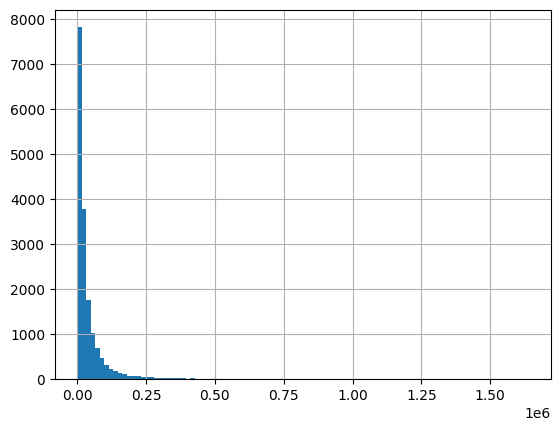

In [29]:
df.views.hist(bins=100)

<Axes: >

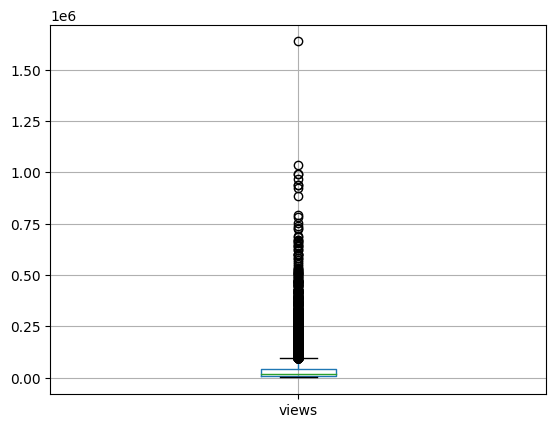

In [30]:
df[['views']].boxplot()

大部分的影视的点击率，都是接近的，但是有一些确实很高，但是其应该不是错误数据

查看一下前20名电影的views的数据

In [31]:
def top_15(column):
    temp = df.sort_values([column],ascending=False).head(15)

    
    plt.barh(temp['title'],temp[column])
    plt.show()

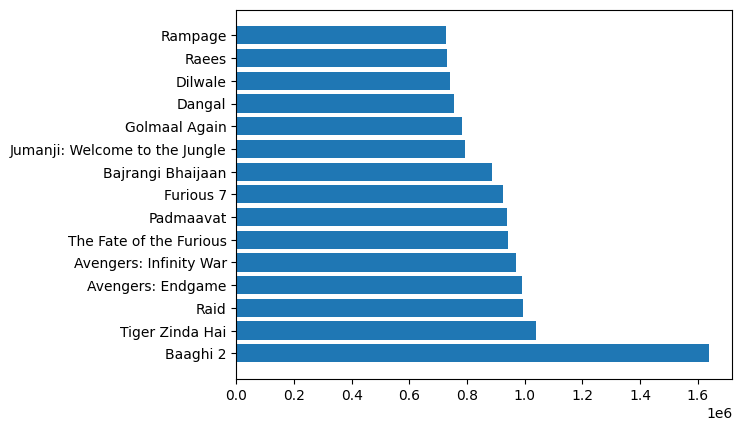

In [32]:
top_15('views')

In [33]:
max_view = 1.638533e+06
df[df['views']==max_view]

,imdb_rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
8560,4.8,Not Rated,Ahmed Khan,230577.0,258332,Bollywood / Indian,Hindi,"31 Mar, 2018",Mar 30 2018,137,Ronnie is serving in the Indian army.He gets a...,Baaghi 2,1638533.0,"Sajid Nadiadwala, Jojo Khan, Abbas Hirapurwala"


In [34]:
df.sort_values('views',ascending=False).head(5)


,imdb_rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
8560,4.8,Not Rated,Ahmed Khan,230577.0,258332,Bollywood / Indian,Hindi,"31 Mar, 2018",Mar 30 2018,137,Ronnie is serving in the Indian army.He gets a...,Baaghi 2,1638533.0,"Sajid Nadiadwala, Jojo Khan, Abbas Hirapurwala"
9055,5.9,Not Rated,Ali Abbas Zafar,366624.0,248092,Bollywood / Indian,"Hindi,English","23 Dec, 2017",Dec 22 2017,161,A dreaded terrorist organization run by Abu Us...,Tiger Zinda Hai,1038317.0,"Neelesh Misra, Ali Abbas Zafar, Aditya Chopra"
8064,7.4,Not Rated,Raj Kumar Gupta,170601.0,256818,Bollywood / Indian,Hindi,"17 Mar, 2018",Mar 16 2018,122,"Set in the 80s in Uttar Pradesh, India, Raid i...",Raid,993825.0,"Nischay Kutt, Imran Manzoor, Ritesh Shah"
5721,8.4,PG-13,"Anthony Russo, Joe Russo",337703.0,299108,Hollywood / English,"English,Japanese,Xhosa,German","25 Apr, 2019",Apr 26 2019,181,After the devastating events of Avengers: Infi...,Avengers: Endgame,991133.0,"Christopher Markus, Stephen McFeely, Stan Lee"
8130,8.4,PG-13,"Anthony Russo, Joe Russo",339146.0,261371,Hollywood / English,English,"27 Apr, 2018",Apr 27 2018,149,As the Avengers and their allies have continue...,Avengers: Infinity War,969673.0,"Christopher Markus, Stephen McFeely, Stan Lee"


In [35]:
df_dtype(df)

,dtype,specimen,nunique,null_count,null_share
imdb_rating,float64,6.4,85,477,2.79%
appropriate_for,object,TV-PG,21,7277,42.59%
director,object,Paul Ziller,9672,1566,9.17%
downloads,float64,73.0,10479,1,0.01%
id,object,372091,17086,0,0.00%
industry,object,Hollywood / English,10,1,0.01%
language,object,English,1168,534,3.13%
posted_date,object,"20 Feb, 2023",4123,1,0.01%
release_date,object,Feb 05 2023,4886,1,0.01%
run_time,object,84,415,1000,5.85%


views有一个为空，所以直接删除即可

In [36]:
df.drop(df[df['views'].isna()].index.tolist(),inplace=True)

In [37]:
df_dtype(df)

,dtype,specimen,nunique,null_count,null_share
imdb_rating,float64,6.4,85,477,2.79%
appropriate_for,object,TV-PG,21,7276,42.59%
director,object,Paul Ziller,9672,1565,9.16%
downloads,float64,73.0,10479,0,0.00%
id,object,372091,17085,0,0.00%
industry,object,Hollywood / English,10,0,0.00%
language,object,English,1168,533,3.12%
posted_date,object,"20 Feb, 2023",4123,0,0.00%
release_date,object,Feb 05 2023,4886,0,0.00%
run_time,object,84,415,999,5.85%


在删除views为0的值后，downloads的空值数量也变为了0

（5）downloads

<Axes: >

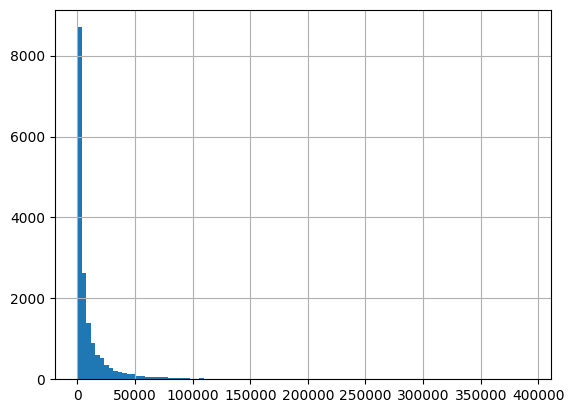

In [38]:
df.downloads.hist(bins=100)

download的五数分布如下

In [39]:
df.downloads.describe()

count     17085.000000
mean      12575.807609
std       25542.926019
min           0.000000
25%        1287.000000
50%        3757.000000
75%       12224.000000
max      391272.000000
Name: downloads, dtype: float64

downloads的盒图

<Axes: >

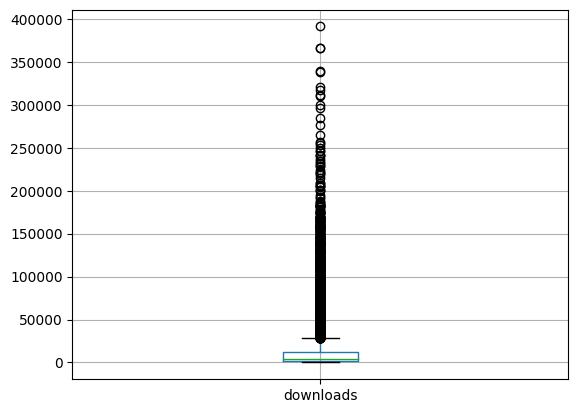

In [40]:
df[['downloads']].boxplot()

可以看到大部分电影的下载量大约在一万左右，但是还有一小部分的下载量和非常的高，这也符合电影的规律

可以查看一下downloads和views之间的分布关系，QQ图

In [41]:
import seaborn as sns

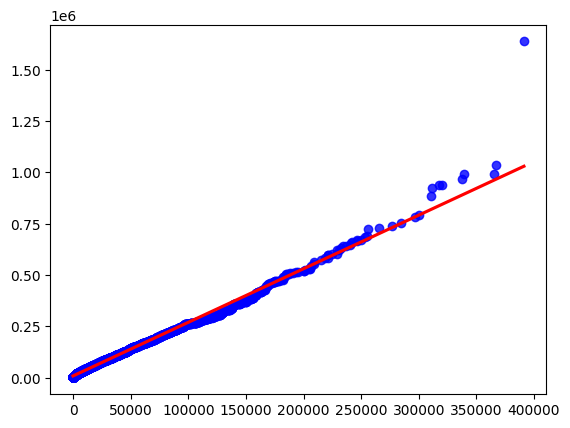

In [42]:
ls1 = sorted(df['views'].values)
ls2 = sorted(df['downloads'].values)
sns.regplot(x=pd.Series(ls2),y=pd.Series(ls1),ci=None,color='b',line_kws={'color':'r'})
plt.show()

说明  views和download 基本上符合同一分布

(6)imdb-rating

imdb_rating和views和download的分布，可以考虑使用views或download的属性来拿填充空值

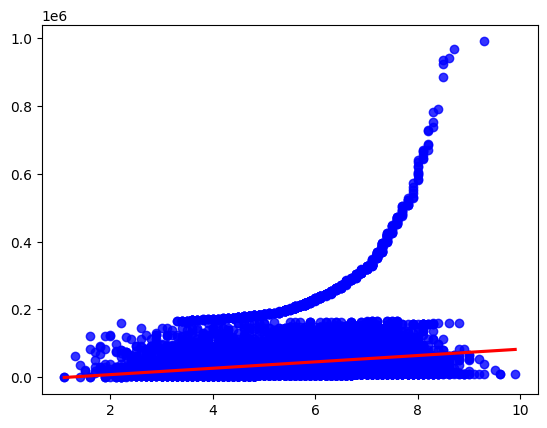

In [43]:
ls1 = sorted(df['views'].values)
ls2 = sorted(df['imdb_rating'].values)
sns.regplot(x=pd.Series(ls2),y=pd.Series(ls1),ci=None,color='b',line_kws={'color':'r'})
plt.show()

相关性分析

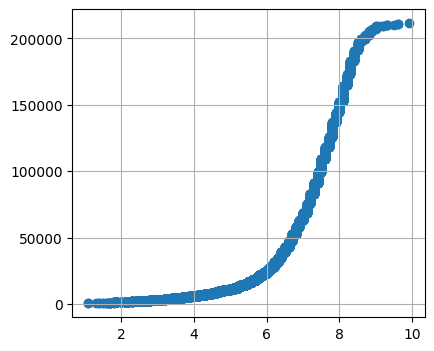

In [44]:
# 图示初判
# （1）变量之间的线性相关性


data1 = df['imdb_rating'].sort_values()
data2 = df['views'].sort_values()



fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(data1, data2)
plt.grid()



views和imdb_rating 是正相关，但是没有明确的关系，imdb_rating和downloads应该也是一样，所以不能使用相关的属性来填写评分中的空值

In [45]:
df.imdb_rating.describe()

count    16608.000000
mean         5.596351
std          1.281076
min          1.100000
25%          4.700000
50%          5.700000
75%          6.500000
max          9.900000
Name: imdb_rating, dtype: float64

没有异常值

In [46]:
df['imdb_rating'].isna().sum()

477

<Axes: >

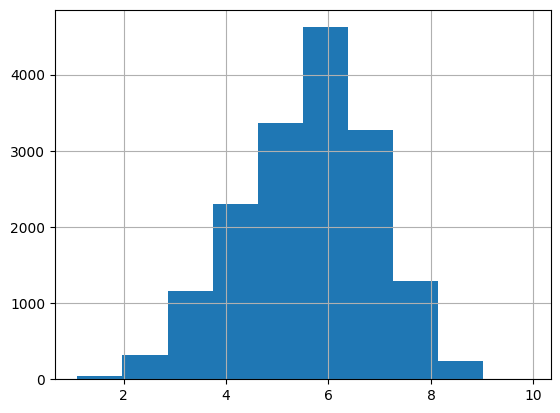

In [47]:
df['imdb_rating'].hist(bins=10)

可以看到频率最高的评分在6左右，所以可以使用6来填补空缺值

In [48]:
df[df['imdb_rating'].isna()].index

Int64Index([    6,    12,    16,    18,    24,    62,    77,   105,   112,
              114,
            ...
            19975, 20052, 20118, 20271, 20458, 20459, 20460, 20543, 20546,
            20547],
           dtype='int64', length=477)

In [49]:
df['imdb_rating'].fillna(6,inplace= True)

In [50]:
df_dtype(df)

,dtype,specimen,nunique,null_count,null_share
imdb_rating,float64,6.4,85,0,0.00%
appropriate_for,object,TV-PG,21,7276,42.59%
director,object,Paul Ziller,9672,1565,9.16%
downloads,float64,73.0,10479,0,0.00%
id,object,372091,17085,0,0.00%
industry,object,Hollywood / English,10,0,0.00%
language,object,English,1168,533,3.12%
posted_date,object,"20 Feb, 2023",4123,0,0.00%
release_date,object,Feb 05 2023,4886,0,0.00%
run_time,object,84,415,999,5.85%


imdb_rating填充成功

（7）appropriate_for

表示的是该影片的受众对象，该属性应该不是重点， 应该不用特别处理

<Axes: >

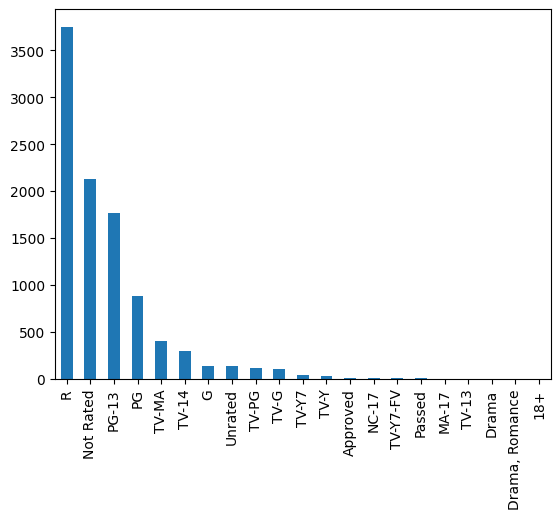

In [51]:
df.appropriate_for.value_counts().plot(kind='bar')

(8)language

In [52]:
df.language.isna().sum()

533

In [53]:
lanlist = df.language.unique().tolist()
print(lanlist[0])

English


In [54]:
df.language.nunique()

1168

In [55]:
i = 0
for lan in lanlist:
    if 'English' in str(lan):
        i = i+1
i

1007

英语是最频繁出现的语言，使用英语进填充

In [56]:
df['language'].fillna('English',inplace=True)

In [57]:
df['language'].isna().sum()

0

填充成功

（9）industry

In [58]:
df['industry'].isna().sum()

0

没有缺失值

In [59]:
df['industry'].unique()

array(['Hollywood / English', 'Tollywood', 'Wrestling',
       'Bollywood / Indian', 'Punjabi', 'Anime / Kids',
       'Dub / Dual Audio', 'Pakistani', 'Stage shows', '3D Movies'],
      dtype=object)

In [60]:
df['industry'].nunique()

10

<Axes: xlabel='industry'>

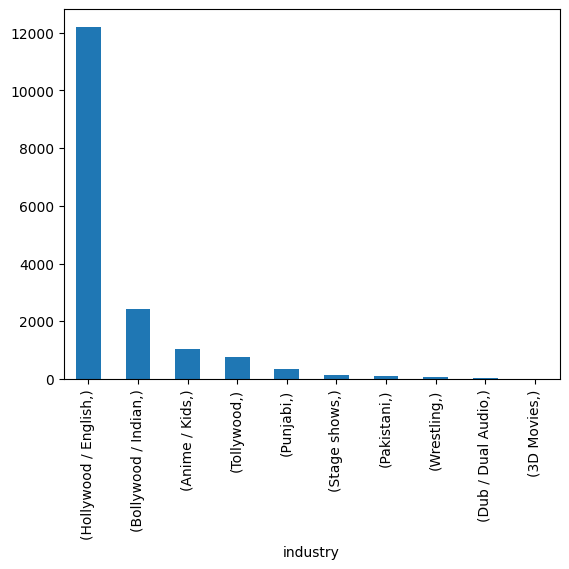

In [61]:
df[['industry']].value_counts().plot(kind='bar')

Hollywood / English  产生的影片最多

(10) posted_date <br>
(11) release_date

In [62]:
df['posted_date'].isna().sum()

0

In [63]:
display(df[['release_date', 'posted_date']].head())

,release_date,posted_date
1,Feb 05 2023,"20 Feb, 2023"
2,Jun 18 2021,"20 Apr, 2021"
4,Jan 26 2023,"20 Feb, 2023"
5,Nov 26 2021,"20 Feb, 2023"
6,Feb 18 2023,"19 Feb, 2023"


In [64]:
df['posted_date'] = pd.to_datetime(df['posted_date'])
df['release_date'] = pd.to_datetime(df['release_date'])

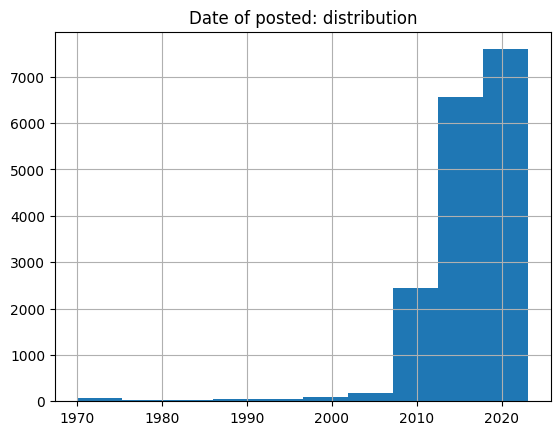

In [65]:
df['posted_date'].hist()
plt.title('Date of posted: distribution')
plt.show()

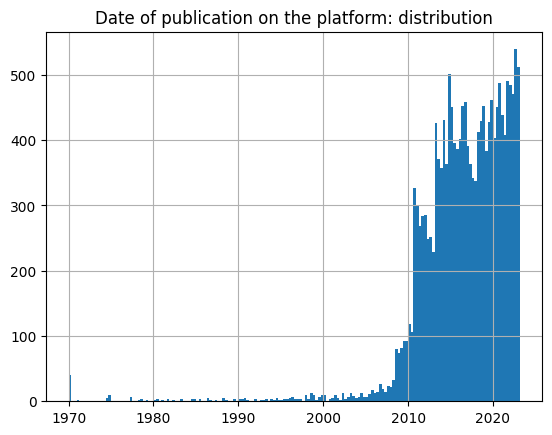

In [66]:
df['posted_date'].hist(bins=170)
plt.title('Date of publication on the platform: distribution')
plt.show()

1970年的数据有些异常，和大部分在近些年的数据不同

<Axes: >

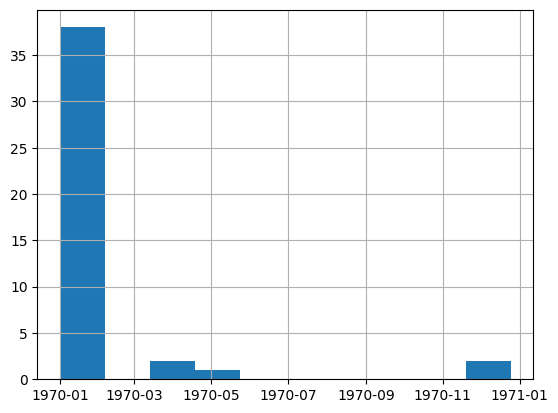

In [67]:
df.loc[df['posted_date'].dt.year == 1970]['posted_date'].hist()

1970年1月份数据异常，可能需要删除，下面看一下1970年发行电影情况

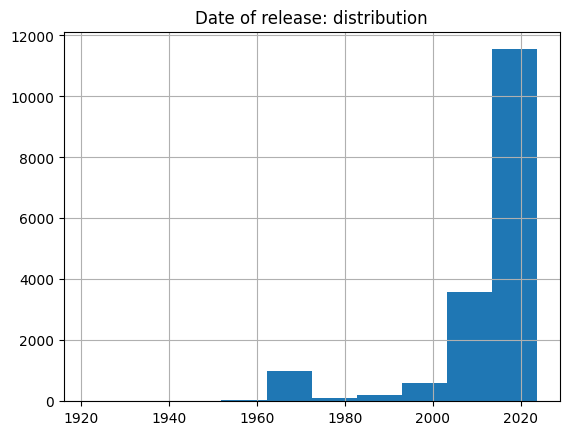

In [68]:
df['release_date'].hist()
plt.title('Date of release: distribution')
plt.show()

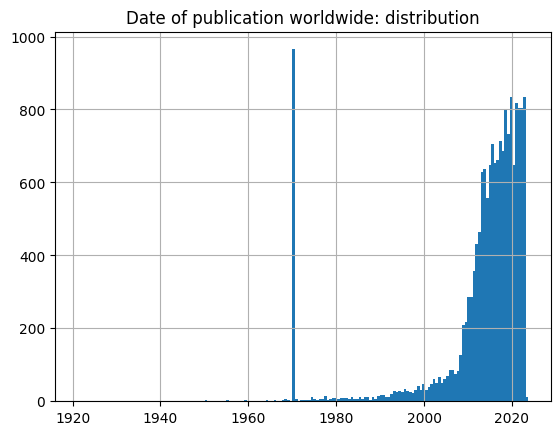

In [69]:
df['release_date'].hist(bins=170)
plt.title('Date of publication worldwide: distribution')
plt.show()

<Axes: >

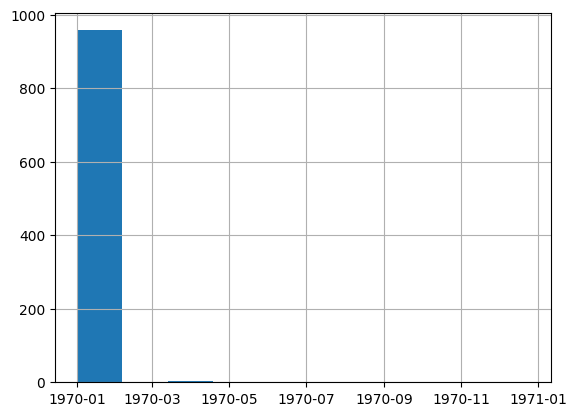

In [70]:
df.loc[df['release_date'].dt.year == 1970]['release_date'].hist()

In [71]:
anomaly_date_1970 = df.loc[df['release_date'].dt.year == 1970]['release_date'].mode().iloc[0]
anomaly_date_1970 

Timestamp('1970-01-01 00:00:00')

In [72]:
abnormal_1970_df = df.loc[df['release_date'] == anomaly_date_1970]

In [73]:
print(len(abnormal_1970_df))
abnormal_release_to_all = round(len(abnormal_1970_df) / len(df), 2) * 100
print(f"That's about {abnormal_release_to_all}% of total.")

958
That's about 6.0% of total.


异常的数据量较多，不能直接删除

可以看一下，盗版时间在发行时间之前的异常数据

In [74]:
df[df['posted_date']<df['release_date']]

,imdb_rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
2,5.2,R,Ben Wheatley,1427.0,343381,Hollywood / English,"English,Hindi",2021-04-20,2021-06-18,1h 47min,As the world searches for a cure to a disastro...,In the Earth,14419.0,Ben Wheatley
7,6.5,R,Benjamin Caron,1781.0,371751,Hollywood / English,English,2023-02-13,2023-02-17,116,"Motivations are suspect, and expectations are ...",Sharper,18225.0,"Brian Gatewood, Alessandro Tanaka"
47,6.1,PG-13,Florian Zeller,483.0,370801,Hollywood / English,English,2023-01-23,2023-02-17,123,Peter\r\n has his busy life with new partner B...,The Son,7475.0,"Florian Zeller, Christopher Hampton"
61,7.3,NaN,Revathy,15457.0,368900,Bollywood / Indian,Hindi,2022-12-10,2023-02-10,137,"Sujata, an ideal mother, who battled the most ...",Salaam Venky,73463.0,"Sameer Arora, Kausar Munir"
114,6.0,NaN,Daniel Diosdado,1438.0,371286,Hollywood / English,English,2023-02-02,2023-02-14,84,A mysterious figure starts to sabotage a local...,The Nomad,15732.0,Daniel Diosdado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20179,8.4,R,Chan-wook Park,6426.0,12453,Hollywood / English,Korean,2003-03-22,2003-11-21,120 min,An average man is kidnapped and imprisoned in ...,Oldeuboi,18927.0,"Garon Tsuchiya, Nobuaki Minegishi"
20195,6.2,Not Rated,Vikram Bhatt,39983.0,945,Bollywood / Indian,Hindi,2002-05-19,2002-06-19,158,Vikrant and Gulab Khatri are brothers-in-law w...,Awara Paagal Deewana,73096.0,"Anand S. Vardhan, Mangesh Kulkarni, Neeraj Vora"
20207,6.2,R,Victor Salva,21943.0,12431,Hollywood / English,English,2001-09-01,2013-06-08,90,On their way back home during the spring break...,Jeepers Creepers,61301.0,Victor Salva
20224,4.0,Not Rated,Lawrence D'Souza,10812.0,492,Bollywood / Indian,"Hindi,English",2000-12-01,2009-06-03,170,"Vijay Verma is a rich, selfish playboy who enj...",Sanam Teri Kasam,29553.0,Talat Rekhi


这个盗版网页的功能较强，有一些电影在全球发行前就能在盗版网页上看到

（12）run_time

In [75]:
df.run_time.isna().sum()

999

run_time一共有999行空数据，不能直接删除

In [76]:
df['run_time']

1              84
2        1h 47min
4             122
5             131
6             200
           ...   
20543         NaN
20544         159
20545    1h 50min
20546         NaN
20547         NaN
Name: run_time, Length: 17085, dtype: object

In [77]:
df['run_time'].index

Int64Index([    1,     2,     4,     5,     6,     7,     8,     9,    10,
               12,
            ...
            20538, 20539, 20540, 20541, 20542, 20543, 20544, 20545, 20546,
            20547],
           dtype='int64', length=17085)

数据格式不统一,将格式都转换为分钟

In [78]:

for time in df['run_time'].tolist():
    ti = 0
    if 'h' in str(time) and 'min' in str(time):
        t = str(time).rsplit('h')
        m = t[1].rsplit('min')
        ti = int(t[0])*60 + int(m[0])
        df.loc[df[df['run_time']==time].index, 'run_time'] = str(ti)  
    if 'h'  in str(time) and 'min'  not in str(time):
        t = str(time).rsplit('h')
        ti = int(t[0])*60
        df.loc[df[df['run_time']==time].index, 'run_time'] = str(ti)  
    if 'h'not  in str(time) and 'min'  in str(time):
        t = str(time).rsplit('min')
        ti = int(t[0])
        df.loc[df[df['run_time']==time].index, 'run_time'] = str(ti)    
    
        
        

In [79]:
df.run_time

1         84
2        107
4        122
5        131
6        200
        ... 
20543    NaN
20544    159
20545    110
20546    NaN
20547    NaN
Name: run_time, Length: 17085, dtype: object

In [80]:
df.run_time = df.run_time.astype('float64')

可以看到，将已有的时间格式都化为统一的格式，空值除外

查看这些时间的分布情况

In [81]:
df.run_time.describe()

count    16086.000000
mean       105.886423
std         24.253712
min          2.000000
25%         90.000000
50%         99.000000
75%        118.000000
max        321.000000
Name: run_time, dtype: float64

<Axes: >

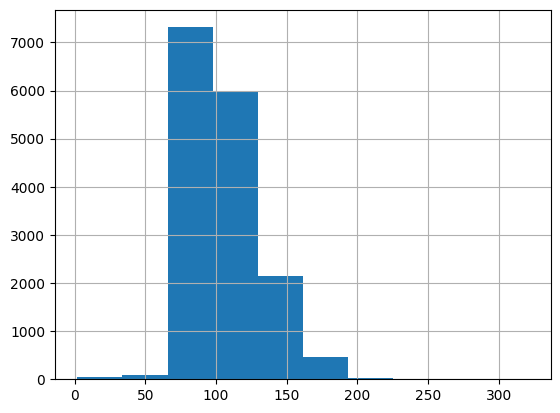

In [82]:
df.run_time.hist(bins=10)

使用均值来填充空值

In [83]:
df['run_time'].fillna(106,inplace=True)

均值为：105.886423， 所以使用106来填充，并且能成功填充

(13)director

缺失值的数量

In [84]:
df.director.isna().sum()

1565

In [85]:
df.director.unique()

array(['Paul Ziller', 'Ben Wheatley', 'Shaji Kailas', ..., 'Guy Hamilton',
       'C.V. Sridhar', 'Bimal Roy'], dtype=object)

In [86]:
df.director.nunique()

9672

导演数量太多

(14)writer

In [87]:
df.writer.isna().sum()

1819

In [88]:
df.writer.unique()

array(['John Christian Plummer', 'Ben Wheatley', 'Rajesh Jayaraman', ...,
       'James Kennaway, Wilfred Greatorex, Derek Dempster',
       'Abrar Alvi, Raj Baldev Raj',
       'Rajinder Singh Bedi, Saratchandra Chatterjee, Nabendu Ghosh'],
      dtype=object)

In [89]:
df.writer.nunique()

13603

演员数量太多

## 3 对比新旧数据

In [90]:
old_df

,imdb_rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,4.8,R,John Swab,304,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,"2,794",John Swab
1,6.4,TV-PG,Paul Ziller,73,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,"1,002",John Christian Plummer
2,5.2,R,Ben Wheatley,"1,427",343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,"14,419",Ben Wheatley
3,8.1,NaN,Venky Atluri,"1,549",372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,"4,878",Venky Atluri
4,4.6,NaN,Shaji Kailas,657,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,"2,438",Rajesh Jayaraman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20543,NaN,NaN,NaN,"1,998",28957,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 13 1959,NaN,NaN,Bhai-Bahen,"6,219",NaN
20544,7.7,NaN,Bimal Roy,"6,080",28958,Bollywood / Indian,Hindi,"01 Jan, 1970",May 13 1955,159,Devdas and Parvati had been inseparable as chi...,Devdas,"16,376","Rajinder Singh Bedi, Saratchandra Chatterjee, ..."
20545,8.0,NaN,NaN,"3,276",30459,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 28 1958,1h 50min,"While driving his car on a rainy night, Anand'...",Madhumati,"7,220",NaN
20546,NaN,NaN,NaN,309,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,NaN,NaN,TNA.Impact 2023-02-09,"1,419",NaN


In [91]:
df_dtype(old_df)

,dtype,specimen,nunique,null_count,null_share
imdb_rating,float64,4.8,85,841,4.09%
appropriate_for,object,R,21,9476,46.12%
director,object,John Swab,9672,1938,9.43%
downloads,object,304,10625,1,0.00%
id,int64,372092,17086,0,0.00%
industry,object,Hollywood / English,10,1,0.00%
language,object,English,1168,542,2.64%
posted_date,object,"20 Feb, 2023",4123,1,0.00%
release_date,object,Jan 28 2023,4886,1,0.00%
run_time,object,105,415,1768,8.60%


In [92]:
df

,imdb_rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
1,6.4,TV-PG,Paul Ziller,73.0,372091,Hollywood / English,English,2023-02-20,2023-02-05,84.0,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002.0,John Christian Plummer
2,5.2,R,Ben Wheatley,1427.0,343381,Hollywood / English,"English,Hindi",2021-04-20,2021-06-18,107.0,As the world searches for a cure to a disastro...,In the Earth,14419.0,Ben Wheatley
4,4.6,NaN,Shaji Kailas,657.0,372089,Tollywood,Hindi,2023-02-20,2023-01-26,122.0,A man named Kalidas gets stranded due to the p...,Alone,2438.0,Rajesh Jayaraman
5,5.4,NaN,Srinivas Gavireddy,746.0,372088,Tollywood,Hindi,2023-02-20,2021-11-26,131.0,"Bagaram,\r\n after inheriting his grandfather'...",Anubhavinchu Raja,2940.0,"Srinivas Gavireddy, Mayukh Adithya"
6,6.0,TV-PG,NaN,5332.0,372059,Wrestling,English,2023-02-19,2023-02-18,200.0,Undisputed\r\n WWE Universal title: Reigns vs ...,WWE Elimination Chamber,11978.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20543,6.0,NaN,NaN,1998.0,28957,Bollywood / Indian,Hindi,1970-01-01,1959-03-13,106.0,NaN,Bhai-Bahen,6219.0,NaN
20544,7.7,NaN,Bimal Roy,6080.0,28958,Bollywood / Indian,Hindi,1970-01-01,1955-05-13,159.0,Devdas and Parvati had been inseparable as chi...,Devdas,16376.0,"Rajinder Singh Bedi, Saratchandra Chatterjee, ..."
20545,8.0,NaN,NaN,3276.0,30459,Bollywood / Indian,Hindi,1970-01-01,1958-03-28,110.0,"While driving his car on a rainy night, Anand'...",Madhumati,7220.0,NaN
20546,6.0,NaN,NaN,309.0,371669,Wrestling,English,2023-02-10,2023-02-09,106.0,NaN,TNA.Impact 2023-02-09,1419.0,NaN


In [93]:
df_dtype(df)

,dtype,specimen,nunique,null_count,null_share
imdb_rating,float64,6.4,85,0,0.00%
appropriate_for,object,TV-PG,21,7276,42.59%
director,object,Paul Ziller,9672,1565,9.16%
downloads,float64,73.0,10479,0,0.00%
id,object,372091,17085,0,0.00%
industry,object,Hollywood / English,10,0,0.00%
language,object,English,1168,0,0.00%
posted_date,datetime64[ns],2023-02-20 00:00:00,4123,0,0.00%
release_date,datetime64[ns],2023-02-05 00:00:00,4886,0,0.00%
run_time,float64,84.0,200,0,0.00%


对于数据集的差异在以下方面：
    <ol>
    <li>删除第一列无用数据</li>
    <li>对数据类型处理，downloads、posted_date、release_date、run_time等进行类型处理 </li>
    <li>对views中，时间序列处理，删除了以往的同类型的记录</li>
    <li>对缺失值的填充，对views和downloads中缺失值只有一个，直接删除。industry、language、电影评分中使用最频繁的值俩填充空值；run_time是通过求平均值来填充的</li>
    <li>views对异常值进行了分析处理</li>
    <li>删除了posted_date、release_date中 数量异常的记录</li>
    </ol>